# Rede neural com camadas escondidas - Classificação do Iris dataset

O objetivo desse experimento é ilustrar o uso de rede neural que tenha mais de uma camada. Isso é conseguido com a inserção de uma ativação não linear entre as camadas.

Datasets utilizados:
    - Iris - 3 classes
    - Sintéticos:
        - meia luas
        - círculos circunscritos
        - blobs

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/Net2RegressaoSoftmaxArgmaxRede.png)

## Importando as bibliotecas

In [1]:
%matplotlib inline
from sklearn import datasets
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable
import torch.nn as nn

## Leitura, normalização e visualização dos dados

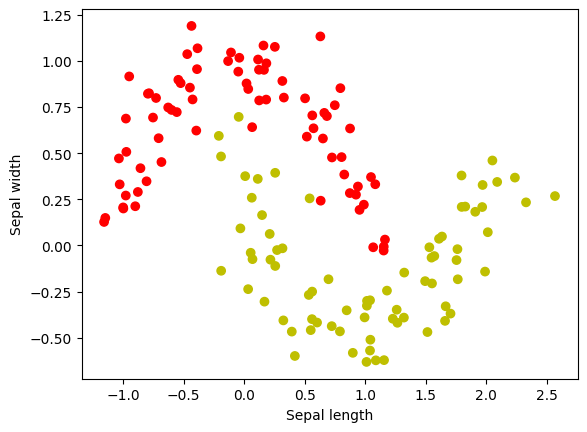

In [2]:
n_samples = 150
options = ['iris', 'moon', 'circles', 'blobs']
option = options[1]
if option == 'iris':
    iris = datasets.load_iris()
    X = iris.data[:,:2]  # comprimento das sépalas e pétalas, indices 0 e 2
    Xc = X - X.min(axis=0)
    Xc /= Xc.max(axis=0)
    Y = iris.target
elif option == 'moon':
    Xc,Y = datasets.make_moons(n_samples=n_samples, noise=.15)
elif option == 'circles':
    Xc,Y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.1)
elif option == 'blobs':
    Xc,Y = datasets.make_blobs(n_samples=n_samples,centers=3,cluster_std=1.2)

colors = np.array(['r','y','b'])
plt.scatter(Xc[:, 0], Xc[:, 1], c=colors[Y])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

### Prepara os dados para o PyTorch

In [3]:
X_tensor = torch.FloatTensor(Xc)
Y_tensor = torch.LongTensor(Y)

## Construindo o modelo da rede

In [4]:
class Modelo(nn.Module):
    def __init__(self):
        super(Modelo, self).__init__()
        self.dense = nn.Sequential(
            nn.Linear(2, 5),
            nn.ReLU(),
            nn.Linear(5,5),
            nn.ReLU(),
            nn.Linear(5,2),
        )

    def forward(self, x):
        x = self.dense(x)

        return x

model = Modelo()
print(model)

Modelo(
  (dense): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): ReLU()
    (2): Linear(in_features=5, out_features=5, bias=True)
    (3): ReLU()
    (4): Linear(in_features=5, out_features=2, bias=True)
  )
)


In [5]:
class Modelo2(nn.Module):
    def __init__(self):
        super(Modelo2, self).__init__()
        self.entrada = nn.Linear(2, 5)
        self.act1 = nn.ReLU()
        self.c1 = nn.Linear(5, 5)
        self.act2 = nn.ReLU()
        self.c2 = nn.Linear(5,2)

    def forward(self, x):
        print(x)
        x = self.entrada(x)
        print(x)
        print("RELU")
        x = self.act1(x)
        print(x)
        x = self.c1(x)
        print(x)
        print("RELU")
        x = self.act2(x)
        print(x)
        x = self.c2(x)

        return x

model2 = Modelo2()
print(model2)

Modelo2(
  (entrada): Linear(in_features=2, out_features=5, bias=True)
  (act1): ReLU()
  (c1): Linear(in_features=5, out_features=5, bias=True)
  (act2): ReLU()
  (c2): Linear(in_features=5, out_features=2, bias=True)
)


In [6]:
class Modelo3(nn.Module):
    def __init__(self):
        super(Modelo3, self).__init__()
        self.entrada = nn.Linear(2, 5)
        self.c1 = nn.Linear(5, 5)
        self.c2 = nn.Linear(5,2)

    def forward(self, x):
        x = self.entrada(x)
        x = nn.ReLU(x)
        x = self.c1(x)
        x = nn.ReLU(x)
        x = self.c2(x)

        return x

model3 = Modelo3()
print(model3)

Modelo3(
  (entrada): Linear(in_features=2, out_features=5, bias=True)
  (c1): Linear(in_features=5, out_features=5, bias=True)
  (c2): Linear(in_features=5, out_features=2, bias=True)
)


## _predict_ utilizada para predição de classes e na visualização

In [7]:
X_tensor[0:4]

tensor([[ 0.8276,  0.3841],
        [ 0.7917, -0.4652],
        [-0.9779,  0.6870],
        [ 1.1541, -0.0064]])

In [8]:
y_pred = model(X_tensor[0:4])
y_pred

tensor([[0.2996, 0.1443],
        [0.3044, 0.1063],
        [0.3034, 0.0686],
        [0.2851, 0.1190]], grad_fn=<AddmmBackward0>)

In [9]:
y_pred = model2(X_tensor[0:4])
y_pred

tensor([[ 0.8276,  0.3841],
        [ 0.7917, -0.4652],
        [-0.9779,  0.6870],
        [ 1.1541, -0.0064]])
tensor([[ 0.0620,  0.4461,  0.4843, -0.2793, -0.2997],
        [ 0.0239,  0.9160,  0.4956, -0.6729, -0.0957],
        [-0.5368, -0.9696,  0.9383, -0.6764, -0.8440],
        [ 0.1600,  0.8976,  0.4031, -0.3589, -0.1170]],
       grad_fn=<AddmmBackward0>)
RELU
tensor([[0.0620, 0.4461, 0.4843, 0.0000, 0.0000],
        [0.0239, 0.9160, 0.4956, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.9383, 0.0000, 0.0000],
        [0.1600, 0.8976, 0.4031, 0.0000, 0.0000]], grad_fn=<ReluBackward0>)
tensor([[-0.3668, -0.1692, -0.2441,  0.2777, -0.2476],
        [-0.1767, -0.2015, -0.2933,  0.0958, -0.1056],
        [-0.6864,  0.0595, -0.1848,  0.6685, -0.4503],
        [-0.1378, -0.2360, -0.3286,  0.0428, -0.0770]],
       grad_fn=<AddmmBackward0>)
RELU
tensor([[0.0000, 0.0000, 0.0000, 0.2777, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0958, 0.0000],
        [0.0000, 0.0595, 0.0000, 0.6685, 0.

tensor([[-0.3770, -0.2658],
        [-0.3048, -0.2879],
        [-0.5427, -0.2384],
        [-0.2837, -0.2943]], grad_fn=<AddmmBackward0>)

In [10]:
y_pred
import torch.nn.functional as F
y_prob = F.softmax(y_pred, dim=1)*100
y_prob

tensor([[47.2226, 52.7774],
        [49.5777, 50.4223],
        [42.4498, 57.5502],
        [50.2655, 49.7345]], grad_fn=<MulBackward0>)

In [11]:
y_class_prob, y_class = torch.max(y_prob, dim=1)
print(y_class_prob)
print(y_class)

tensor([52.7774, 50.4223, 57.5502, 50.2655], grad_fn=<MaxBackward0>)
tensor([1, 1, 1, 0])


In [12]:
def predict(model, inputs):
    outputs = model(Variable(inputs))
    _, predicts = torch.max(outputs, 1)

    return predicts.data.numpy()

## Classe para visualização dinâmica

In [13]:
class BoundaryPlotter():
    def __init__(self, model, X, Y, n_epoch, filepath=None, h = .01):
        self.model = model
        self.X = X
        self.Y = Y
        self.n_epoch = n_epoch
        self.filepath = filepath
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        self.xx, self.yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        self.loss_hist = []
        self.val_loss_hist = []
        self.X_grid = np.c_[self.xx.ravel(), self.yy.ravel()]

        #Gráficos a serem mostrados pelo callback
        self.fig = plt.figure(figsize=(8, 4), dpi=100)
        self.ax1 = self.fig.add_subplot(1, 2, 1)
        self.ax1.set_xlim(0, nb_epoch)
        self.ax1.set_xlabel('Epoca')#,fontsize=28)
        self.ax1.set_ylabel('Perda')#,fontsize=28)
        self.ax1.plot([],[],'b',linewidth = 2.0,label = "Treino")
        self.ax1.grid(True)

        self.ax2 = self.fig.add_subplot(1, 2, 2)
        self.ax2.set_xlim(Xc[:,0].min(), Xc[:,0].max())
        self.ax2.set_ylim(Xc[:,1].min(), Xc[:,1].max())
        self.ax2.set_xlabel('Comprimento da Sepala')#,fontsize=28)
        self.ax2.set_ylabel('Largura da Sepala')#,fontsize=28)

    def on_train_begin(self, logs={}):
        display.display(self.fig)
        display.clear_output(wait=True)

    def on_epoch_end(self, epoch, logs={}):
        if 'loss' in logs.keys():
            self.loss_hist.append(logs['loss'])

            if epoch%250==0:
                self.ax1.plot(np.arange(epoch+1), self.loss_hist, 'b', linewidth = 2.0)

                Z = predict(self.model, torch.from_numpy(self.X_grid).type(torch.FloatTensor))
#                 Z = torch.max(self.model(Variable(torch.FloatTensor(self.X_grid))).data, dim=1)[1].numpy()
                Z = Z.reshape(self.xx.shape)

                self.ax2.pcolormesh(self.xx, self.yy, Z, cmap=plt.cm.Paired)
                colors = np.array(['r','y','b'])
                self.ax2.scatter(self.X[:, 0], self.X[:, 1], s=40, c=colors[self.Y], edgecolors='k', cmap=plt.cm.Paired)

                display.display(self.fig)
                display.clear_output(wait=True)

## Treinamento

In [14]:
lr = 0.10

optimizer = torch.optim.SGD(model.parameters(), lr=lr)

criterion = nn.CrossEntropyLoss()

### Laço principal de treinamento

Final loss: tensor(0.0142)


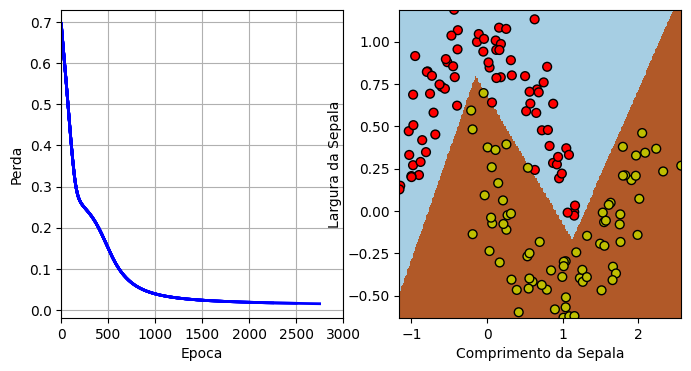

In [15]:
batch_size = 150
nb_epoch = 3000

#Definindo o plotter
boundary_plot = BoundaryPlotter(model, Xc, Y, nb_epoch)

boundary_plot.on_train_begin()
losses = []
for i in range(nb_epoch):
    # predict da rede
    output = model(Variable(X_tensor))

    loss = criterion(output, Variable(Y_tensor))

    # zero, backpropagation gradient, atualiza param gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.data)

    boundary_plot.on_epoch_end(i, {'loss': loss.data})

print('Final loss:', loss.data)

## Avaliação

### Imprimindo pesos finais

In [16]:
for name, w in model.state_dict().items():
    print('{:16}{}'.format(name, w.size()))
    print(w)

dense.0.weight  torch.Size([5, 2])
tensor([[ 1.4491, -0.7336],
        [-0.3214, -0.1394],
        [-0.3695,  1.2101],
        [ 2.5764,  0.7881],
        [ 2.2300,  0.1755]])
dense.0.bias    torch.Size([5])
tensor([ 1.5363, -0.3546,  0.7973, -0.2373, -2.4888])
dense.2.weight  torch.Size([5, 5])
tensor([[ 1.4634, -0.1448, -0.3903, -1.5789,  1.8819],
        [-0.0188, -0.3451, -0.1730,  0.2098, -0.3022],
        [-0.4111, -0.0442,  1.1022,  1.1823, -1.6556],
        [-0.1953, -0.4032, -0.4588,  0.3889,  0.8285],
        [ 1.5194,  0.3371, -0.2119, -1.7792,  2.0087]])
dense.2.bias    torch.Size([5])
tensor([ 0.5091, -0.4419,  0.3220, -0.1910,  0.2602])
dense.4.weight  torch.Size([2, 5])
tensor([[-1.8894,  0.2736,  1.8966, -0.6284, -2.3912],
        [ 2.1904, -0.2856, -1.3441,  0.6841,  1.9364]])
dense.4.bias    torch.Size([2])
tensor([ 0.6892, -0.5394])


### Avaliação do classificador

In [17]:
Y_hat = predict(model, X_tensor)
accuracy = (Y_hat == Y).mean()
print()
print('Training Accuracy: ', accuracy)


Training Accuracy:  1.0


### Matriz de confusão

In [18]:
import pandas as pd
pd.crosstab(Y_hat, Y)

col_0,0,1
row_0,,
0,75,0
1,0,75


## Atividades

### Experimentos:

1. Faça alterações na rede, alterando o número de neurônios, de camadas. Escreva suas conclusões.

**O aumento no número de camadas e neurônios dão maior complexidade a rede. Inlcuindo mais camadas para quebrar a linearidade da rede, permite que a previsão se adeque melhor a comportamentos não lineares.**

2. No lugar da ReLU, coloque Sigmoid e observe a diferença. O que aconteceu?
****A função Sigmoide não quebrou a linearidade da rede e tentou criar a fronteira de divisão com apenas uma reto o que diminui a acurácia do modelo****

Descreva.
3. O que ocorre quando não se utiliza ativação não linear entre camadas?
**A rede perde capacidade de lidar com predições complexas. A rede neural vai utilizar de um modelo linear para realizar a predição, sem a função de ativação não linear para "quebrar" a linearidade dos dados a rede perderá muita capacidade de previsão por estar presa a modelos lineares.**

#Exercício 1

##Aumentando camadas

**ANTES**

nn.Linear(2, 5),

nn.ReLU(),

nn.Linear(5,5),

nn.ReLU(),

nn.Linear(5,2)

<BR>

**DEPOIS**

nn.Linear(2, 5),

nn.ReLU(),

nn.Linear(5, 5),

nn.ReLU(),

nn.Linear(5,5),

nn.ReLU(),

nn.Linear(5,2)

### Construindo o modelo da rede

In [19]:
class Modelo(nn.Module):
    def __init__(self):
        super(Modelo, self).__init__()
        self.dense = nn.Sequential(
            nn.Linear(2, 5),
            nn.ReLU(),
            nn.Linear(5, 5),
            nn.ReLU(),
            nn.Linear(5,5),
            nn.ReLU(),
            nn.Linear(5,2),
        )

    def forward(self, x):
        x = self.dense(x)

        return x

model = Modelo()
print(model)

Modelo(
  (dense): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): ReLU()
    (2): Linear(in_features=5, out_features=5, bias=True)
    (3): ReLU()
    (4): Linear(in_features=5, out_features=5, bias=True)
    (5): ReLU()
    (6): Linear(in_features=5, out_features=2, bias=True)
  )
)


### Treinamento

In [20]:
lr = 0.10

optimizer = torch.optim.SGD(model.parameters(), lr=lr)

criterion = nn.CrossEntropyLoss()

### Laço principal de treinamento

Final loss: tensor(0.0088)


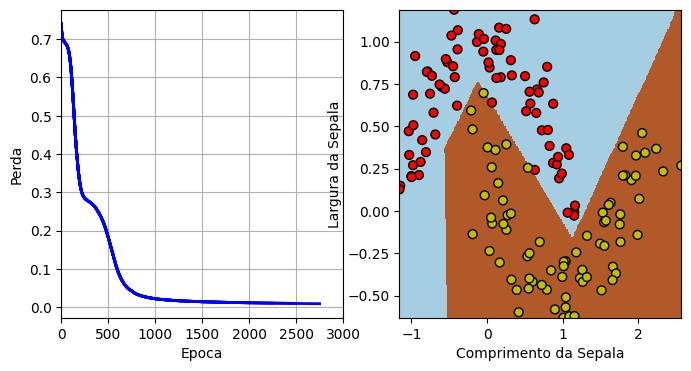

In [21]:
batch_size = 150
nb_epoch = 3000

#Definindo o plotter
boundary_plot = BoundaryPlotter(model, Xc, Y, nb_epoch)

boundary_plot.on_train_begin()
losses = []
for i in range(nb_epoch):
    # predict da rede
    output = model(Variable(X_tensor))

    loss = criterion(output, Variable(Y_tensor))

    # zero, backpropagation gradient, atualiza param gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.data)

    boundary_plot.on_epoch_end(i, {'loss': loss.data})

print('Final loss:', loss.data)

In [22]:
Y_hat = predict(model, X_tensor)
accuracy = (Y_hat == Y).mean()
print()
print('Training Accuracy: ', accuracy)


Training Accuracy:  1.0


In [23]:
pd.crosstab(Y_hat, Y)

col_0,0,1
row_0,,
0,75,0
1,0,75


##Aumentando neuronios

**ANTES**

nn.Linear(2, 5),

nn.ReLU(),

nn.Linear(5,5),

nn.ReLU(),

nn.Linear(5,2)

<BR>

**DEPOIS**

nn.Linear(2, 10),

nn.ReLU(),

nn.Linear(10,10),

nn.ReLU(),

nn.Linear(10,2)

### Construindo o modelo da rede

In [24]:
class Modelo(nn.Module):
    def __init__(self):
        super(Modelo, self).__init__()
        self.dense = nn.Sequential(
            nn.Linear(2, 10),
            nn.ReLU(),
            nn.Linear(10, 10),
            nn.ReLU(),
            nn.Linear(10,2),
        )

    def forward(self, x):
        x = self.dense(x)

        return x

model = Modelo()
print(model)

Modelo(
  (dense): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=2, bias=True)
  )
)


### Treinamento

In [25]:
lr = 0.10

optimizer = torch.optim.SGD(model.parameters(), lr=lr)

criterion = nn.CrossEntropyLoss()

### Laço principal de treinamento

Final loss: tensor(0.0126)


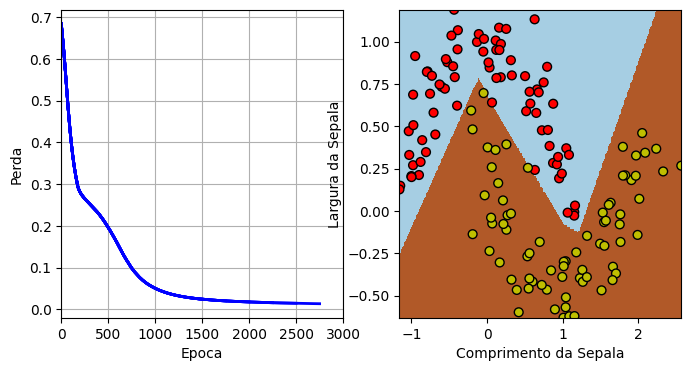

In [26]:
batch_size = 150
nb_epoch = 3000

#Definindo o plotter
boundary_plot = BoundaryPlotter(model, Xc, Y, nb_epoch)

boundary_plot.on_train_begin()
losses = []
for i in range(nb_epoch):
    # predict da rede
    output = model(Variable(X_tensor))

    loss = criterion(output, Variable(Y_tensor))

    # zero, backpropagation gradient, atualiza param gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.data)

    boundary_plot.on_epoch_end(i, {'loss': loss.data})

print('Final loss:', loss.data)

In [27]:
Y_hat = predict(model, X_tensor)
accuracy = (Y_hat == Y).mean()
print()
print('Training Accuracy: ', accuracy)


Training Accuracy:  1.0


In [28]:
pd.crosstab(Y_hat, Y)

col_0,0,1
row_0,,
0,75,0
1,0,75


# Exercício 2



In [29]:
class Modelo(nn.Module):
    def __init__(self):
        super(Modelo, self).__init__()
        self.dense = nn.Sequential(
            nn.Linear(2, 10),
            nn.Sigmoid(),
            nn.Linear(10, 10),
            nn.Sigmoid(),
            nn.Linear(10, 10),
            nn.Sigmoid(),
            nn.Linear(10,2),
        )

    def forward(self, x):
        x = self.dense(x)

        return x

model = Modelo()
print(model)

Modelo(
  (dense): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=10, out_features=10, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=10, out_features=2, bias=True)
  )
)


In [30]:
lr = 0.10

optimizer = torch.optim.SGD(model.parameters(), lr=lr)

criterion = nn.CrossEntropyLoss()

Final loss: tensor(0.2815)


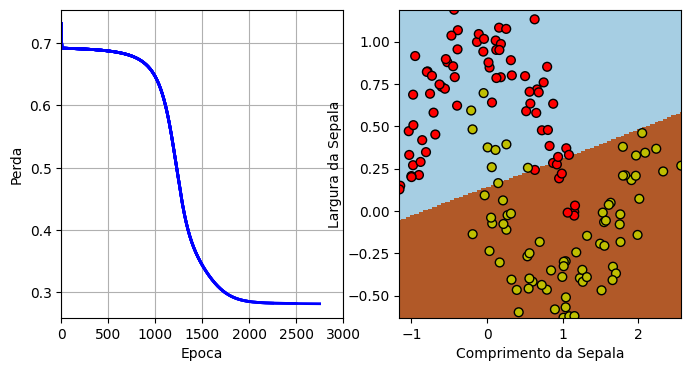

In [31]:
batch_size = 150
nb_epoch = 3000

#Definindo o plotter
boundary_plot = BoundaryPlotter(model, Xc, Y, nb_epoch)

boundary_plot.on_train_begin()
losses = []
for i in range(nb_epoch):
    # predict da rede
    output = model(Variable(X_tensor))

    loss = criterion(output, Variable(Y_tensor))

    # zero, backpropagation gradient, atualiza param gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.data)

    boundary_plot.on_epoch_end(i, {'loss': loss.data})

print('Final loss:', loss.data)

In [32]:
Y_hat = predict(model, X_tensor)
accuracy = (Y_hat == Y).mean()
print()
print('Training Accuracy: ', accuracy)


Training Accuracy:  0.8866666666666667


In [33]:
pd.crosstab(Y_hat, Y)

col_0,0,1
row_0,,
0,66,8
1,9,67
